# Predicting stock market movement based on NLP input

## Install the relevant packages

In [2]:
pip install seaborn


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Importing modules

In [4]:
# Data Preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import xgboost as xgb

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score


from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Data

Data is just loaded for illustrations purposes. The function below has to calculate these steps again.

In [5]:
# Open NLP table from the pickle file created with the NLP code
with open('nlp_task_output.pickle', 'rb') as f:
        df_embedding = pickle.load(f)

df_embedding

,date,W2V embeddings,BERT embeddings,sentiment score,BERT embeddings_mean,W2V embeddings_mean,average sentiment score,bag of words,bag of words_tfidf
0,2022-01-03,"[[-0.0404924675822258, 0.0254952572286129, 0.0...","[[-0.3693830966949463, -0.2471671998500824, -0...","[-1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[-0.228029658080175, -0.17713059568496678, 0.0...","[0.003947518421497581, 0.022911421280827952, 0...",-0.055172,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2022-01-04,"[[-0.0359090156853199, -0.02702840231359005, 0...","[[-0.06224224716424942, -0.2979371249675751, 0...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, -1, 1, 0, 0, 0,...","[-0.230750181076185, -0.18562821314359704, -0....","[0.01112971006991054, 0.014293222201654946, -0...",-0.024390,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2022-01-05,"[[0.01961263082921505, -0.0658365860581398, -0...","[[-0.10791551321744919, -0.1328592747449875, 0...","[1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 1, ...","[-0.23156420670578773, -0.1829247910984611, -0...","[-0.005389764467115278, 0.01680529410577268, -...",0.052239,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2022-01-06,"[[0.09759902954101562, -0.0401458740234375, -0...","[[-0.2522630989551544, -0.28231102228164673, 0...","[1, 1, 0, -1, 0, 1, 1, -1, -1, 0, 0, 0, 0, 0, ...","[-0.23953293037640166, -0.1844954190851176, -0...","[-0.004168366527998112, 0.015012458536378764, ...",0.140845,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2022-01-07,"[[-0.1065848246216774, 0.0205078125, 0.1667131...","[[-0.19235484302043915, -0.22265130281448364, ...","[0, -1, 1, 1, 1, 0, -1, 0, 0, -1, 0, 0, 1, -1,...","[-0.22612745273240412, -0.17468479186153182, -...","[0.00022708027659413906, 0.013337278338999918,...",-0.038462,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
319,2022-12-27,"[[0.046142578125, 0.08237304538488388, -0.0124...","[[-0.3981975317001343, -0.13455665111541748, 0...","[0, 0, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, -1,...","[-0.26531250585188587, -0.1853176990251352, 0....","[-0.014258044573092243, 0.03329225022345071, 0...",-0.195122,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
320,2022-12-28,"[[0.0234505794942379, 0.0063040596432983875, -...","[[-0.23385146260261536, -0.23462671041488647, ...","[1, -1, 0, -1, 1, 0, 0, -1, 1, 0, 1, 0, 0, 0, ...","[-0.24873552998070847, -0.18875928787100646, 0...","[0.006058031684477572, 0.05790834233199281, 0....",0.037037,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
321,2022-12-29,"[[-0.0789097398519516, -0.0066353934817016125,...","[[-0.27909645438194275, -0.10552593320608139, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 1, 1, 1, 1,...","[-0.24983371656708186, -0.1996163552366852, 0....","[0.00018076455796744995, 0.041876158331433544,...",0.078125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
322,2022-12-30,"[[-0.004342215601354837, -0.02432687021791935,...","[[0.01812063157558441, -0.2427556961774826, -0...","[0, 0, 0, 1, 0, 1, 0, 0, -1, 0, 0, -1, -1, 0, ...","[-0.24502491698201215, -0.14490794693535594, -...","[0.008708919138630986, 0.04232665225364534, 0....",-0.053571,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
# Reading the stock data
df_stock = pd.read_csv('bloomberg_nyse_faang_original.csv')
df_stock

,NF_date,NF_open,NF_close
0,2021-12-27,7443.0,7539.0
1,2021-12-28,7539.0,7482.0
2,2021-12-29,7482.0,7421.0
3,2021-12-30,7421.0,7524.0
4,2021-12-31,7524.0,7421.0
...,...,...,...
265,2023-01-02,NaN,NaN
266,2023-01-03,4448.0,4376.0
267,2023-01-04,4376.0,4401.0
268,2023-01-05,4401.0,4293.0


### Labeling the stock price dataset

In [7]:
df_stock['pct_change'] = df_stock['NF_open'].pct_change()

#Shift the 'pct_change' values one row up because the movement is based on previuous days sentiment news
df_stock['pct_change'] = df_stock['pct_change'].shift(-1)
df_stock = df_stock.dropna()

# Create new column with binary values based on pct_change column
df_stock['target'] = df_stock['pct_change'].apply(lambda x: 0 if x < 0 else 1)

# Remove unnecessary columns 
df_stock.drop(['NF_open', 'NF_close', 'pct_change'], axis=1, inplace=True) 

df_stock

C:\Users\flori\AppData\Local\Temp\ipykernel_4012\3524282768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['target'] = df_stock['pct_change'].apply(lambda x: 0 if x < 0 else 1)
C:\Users\flori\AppData\Local\Temp\ipykernel_4012\3524282768.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock.drop(['NF_open', 'NF_close', 'pct_change'], axis=1, inplace=True)


,NF_date,target
0,2021-12-27,1
1,2021-12-28,0
2,2021-12-29,0
3,2021-12-30,1
4,2021-12-31,0
...,...,...
263,2022-12-29,1
264,2022-12-30,1
266,2023-01-03,0
267,2023-01-04,1


In [8]:
df_result = pd.merge(
    df_embedding,
    df_stock,
    how='inner',
    left_on='date', 
    right_on='NF_date')

df_result

,date,W2V embeddings,BERT embeddings,sentiment score,BERT embeddings_mean,W2V embeddings_mean,average sentiment score,bag of words,bag of words_tfidf,NF_date,target
0,2022-01-03,"[[-0.0404924675822258, 0.0254952572286129, 0.0...","[[-0.3693830966949463, -0.2471671998500824, -0...","[-1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[-0.228029658080175, -0.17713059568496678, 0.0...","[0.003947518421497581, 0.022911421280827952, 0...",-0.055172,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-01-03,1
1,2022-01-04,"[[-0.0359090156853199, -0.02702840231359005, 0...","[[-0.06224224716424942, -0.2979371249675751, 0...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, -1, 1, 0, 0, 0,...","[-0.230750181076185, -0.18562821314359704, -0....","[0.01112971006991054, 0.014293222201654946, -0...",-0.024390,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-01-04,0
2,2022-01-05,"[[0.01961263082921505, -0.0658365860581398, -0...","[[-0.10791551321744919, -0.1328592747449875, 0...","[1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 1, ...","[-0.23156420670578773, -0.1829247910984611, -0...","[-0.005389764467115278, 0.01680529410577268, -...",0.052239,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-01-05,0
3,2022-01-06,"[[0.09759902954101562, -0.0401458740234375, -0...","[[-0.2522630989551544, -0.28231102228164673, 0...","[1, 1, 0, -1, 0, 1, 1, -1, -1, 0, 0, 0, 0, 0, ...","[-0.23953293037640166, -0.1844954190851176, -0...","[-0.004168366527998112, 0.015012458536378764, ...",0.140845,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-01-06,1
4,2022-01-07,"[[-0.1065848246216774, 0.0205078125, 0.1667131...","[[-0.19235484302043915, -0.22265130281448364, ...","[0, -1, 1, 1, 1, 0, -1, 0, 0, -1, 0, 0, 1, -1,...","[-0.22612745273240412, -0.17468479186153182, -...","[0.00022708027659413906, 0.013337278338999918,...",-0.038462,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-01-07,0
...,...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,"[[-0.025634765625, -0.05048828199505806, -0.05...","[[-0.3297692537307739, -0.438093900680542, 0.0...","[0, 1, 1, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0,...","[-0.21523074796423317, -0.16981030083877746, -...","[-0.005770994670798673, 0.037307766885222755, ...",0.094118,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 7.711462288956911, 0.0, 0.0, 0.0, 0.0, 0...",2022-12-23,1
247,2022-12-27,"[[0.046142578125, 0.08237304538488388, -0.0124...","[[-0.3981975317001343, -0.13455665111541748, 0...","[0, 0, 0, -1, -1, -1, -1, 0, -1, -1, 0, 0, -1,...","[-0.26531250585188587, -0.1853176990251352, 0....","[-0.014258044573092243, 0.03329225022345071, 0...",-0.195122,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-12-27,0
248,2022-12-28,"[[0.0234505794942379, 0.0063040596432983875, -...","[[-0.23385146260261536, -0.23462671041488647, ...","[1, -1, 0, -1, 1, 0, 0, -1, 1, 0, 1, 0, 0, 0, ...","[-0.24873552998070847, -0.18875928787100646, 0...","[0.006058031684477572, 0.05790834233199281, 0....",0.037037,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-12-28,0
249,2022-12-29,"[[-0.0789097398519516, -0.0066353934817016125,...","[[-0.27909645438194275, -0.10552593320608139, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 1, 1, 1, 1,...","[-0.24983371656708186, -0.1996163552366852, 0....","[0.00018076455796744995, 0.041876158331433544,...",0.078125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2022-12-29,1


These data frames will contain the accuracy of the final output

In [9]:
columns = ['BERT embeddings_mean', 'W2V embeddings_mean', 'bag of words', 'bag of words_tfidf', 'average sentiment score']
rows = ['dummy classifier', 'random forest', 'logistic regression', 'support vector machine', 'xgboost']

accuracy_df = pd.DataFrame(index=rows, columns=columns)
AUC_df = pd.DataFrame(index=rows, columns=columns)
train_df = pd.DataFrame(index=rows, columns=columns)

## Function for machine learning

In [10]:
def data_preprocessing(column_name):

    X = np.stack(df_result[column_name])
    y = df_result['target']
    
    return df_result, X, y 


In [11]:
# Used NLP models that work as input for machine learning task
nlp_models = ['BERT embeddings_mean', 'W2V embeddings_mean', 'bag of words', 'bag of words_tfidf', 'average sentiment score']

## Dummy Classifier

AUC Score / BERT embeddings_mean: 0.5403726708074534
Classification report and confusion matrix: dummy classifier / BERT embeddings_mean
              precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.60      0.43      0.50        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



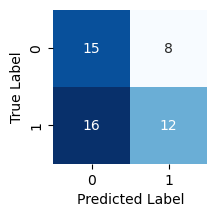

AUC Score / W2V embeddings_mean: 0.5403726708074534
Classification report and confusion matrix: dummy classifier / W2V embeddings_mean
              precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.60      0.43      0.50        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



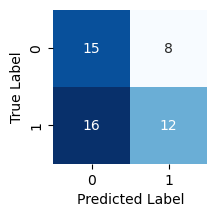

AUC Score / bag of words: 0.5403726708074534
Classification report and confusion matrix: dummy classifier / bag of words
              precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.60      0.43      0.50        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



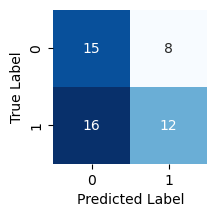

AUC Score / bag of words_tfidf: 0.5403726708074534
Classification report and confusion matrix: dummy classifier / bag of words_tfidf
              precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.60      0.43      0.50        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



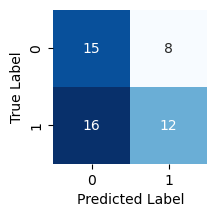

AUC Score / average sentiment score: 0.5403726708074534
Classification report and confusion matrix: dummy classifier / average sentiment score
              precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.60      0.43      0.50        28

    accuracy                           0.53        51
   macro avg       0.54      0.54      0.53        51
weighted avg       0.55      0.53      0.53        51



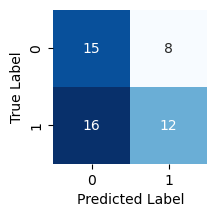

In [12]:
# Accuracy based on most frequent target value
# Calculate data preprocessing, X and y over all nlp_models
for nlp_model in nlp_models: 
    df_BERT, _, _ = data_preprocessing(column_name=nlp_model)
    _, X, _ = data_preprocessing(column_name=nlp_model)
    _, _, y = data_preprocessing(column_name=nlp_model)

    # Dummy classifier provides baseline for comparing other models
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
    dummy_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_dummy = dummy_clf.predict(X_test)
    y_pred_dummy_train = dummy_clf.predict(X_train)

    auc_score = roc_auc_score(y_test, y_pred_dummy)

    # Add accuracy and AUC to result table
    accuracy_df[nlp_model]['dummy classifier'] = accuracy_score(y_test, y_pred_dummy)
    AUC_df[nlp_model]['dummy classifier'] = roc_auc_score(y_test, y_pred_dummy)
    train_df[nlp_model]['dummy classifier'] = accuracy_score(y_train, y_pred_dummy_train)


    # Evaluate the performance of the DummyClassifier
    print(f"AUC Score / {nlp_model}:", auc_score)
    print(f"Classification report and confusion matrix: dummy classifier / {nlp_model}")
    print(classification_report(y_test, y_pred_dummy))

    cm = confusion_matrix(y_test, y_pred_dummy)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Obviously the value is the same for all NLP models

## Random forest classifier
with GridSearch

In [13]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
AUC Score / BERT embeddings_mean: 0.44720496894409933
Classification report and confusion matrix: random forest classifier / BERT embeddings_mean
              precision    recall  f1-score   support

           0       0.41      0.61      0.49        23
           1       0.47      0.29      0.36        28

    accuracy                           0.43        51
   macro avg       0.44      0.45      0.42        51
weighted avg       0.44      0.43      0.42        51

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


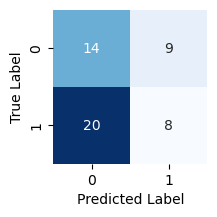

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
AUC Score / W2V embeddings_mean: 0.4588509316770186
Classification report and confusion matrix: random forest classifier / W2V embeddings_mean
              precision    recall  f1-score   support

           0       0.42      0.74      0.54        23
           1       0.45      0.18      0.26        28

    accuracy                           0.43        51
   macro avg       0.44      0.46      0.40        51
weighted avg       0.44      0.43      0.38        51

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


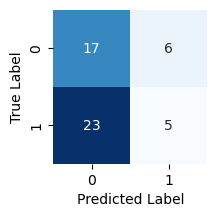

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
AUC Score / bag of words: 0.4782608695652174
Classification report and confusion matrix: random forest classifier / bag of words
              precision    recall  f1-score   support

           0       0.44      0.96      0.60        23
           1       0.00      0.00      0.00        28

    accuracy                           0.43        51
   macro avg       0.22      0.48      0.30        51
weighted avg       0.20      0.43      0.27        51

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


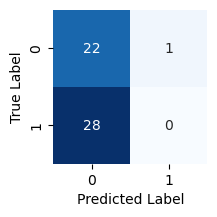

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
AUC Score / bag of words_tfidf: 0.4782608695652174
Classification report and confusion matrix: random forest classifier / bag of words_tfidf
              precision    recall  f1-score   support

           0       0.44      0.96      0.60        23
           1       0.00      0.00      0.00        28

    accuracy                           0.43        51
   macro avg       0.22      0.48      0.30        51
weighted avg       0.20      0.43      0.27        51

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


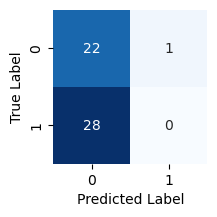

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
AUC Score / average sentiment score: 0.36024844720496896
Classification report and confusion matrix: random forest classifier / average sentiment score
              precision    recall  f1-score   support

           0       0.33      0.43      0.38        23
           1       0.38      0.29      0.33        28

    accuracy                           0.35        51
   macro avg       0.36      0.36      0.35        51
weighted avg       0.36      0.35      0.35        51

Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


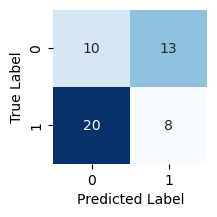

In [14]:
# Calculate data preprocessing, X and y over all nlp_models
for nlp_model in nlp_models: 
    df_BERT, _, _ = data_preprocessing(column_name=nlp_model)
    _, X, _ = data_preprocessing(column_name=nlp_model)
    if nlp_model == 'average sentiment score': #for sentiment column, X has to be reshaped, since only one input feature
        X = X.reshape(-1, 1)
    _, _, y = data_preprocessing(column_name=nlp_model)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    base_clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=base_clf, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)
    
    # Best combination of hyperparameters
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    y_pred_train = best_clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Add accuracy, AUC and test to result table
    accuracy_df[nlp_model]['random forest'] = accuracy_test
    AUC_df[nlp_model]['random forest'] = auc_score
    train_df[nlp_model]['random forest'] = accuracy_train

    # Evaluate the performance of the model
    print(f"AUC Score / {nlp_model}:", auc_score)
    print(f"Classification report and confusion matrix: random forest classifier / {nlp_model}")
    print(classification_report(y_test, y_pred))
    print("Best hyperparameters:")
    print(grid_search.best_params_)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Logistic regression model
with GridSearch for balanced and unbalanced class weights (cost-sensitive learning to rebalance the dataset)

In [15]:
param_grid_lr = {
    'class_weight': [None, 'balanced'],
    'C': [0.1, 1, 10, 100],
}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
AUC Score / BERT embeddings_mean: 0.5186335403726708
Classification report and confusion matrix: logistic regression / BERT embeddings_mean
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        23
           1       0.57      0.43      0.49        28

    accuracy                           0.51        51
   macro avg       0.52      0.52      0.51        51
weighted avg       0.52      0.51      0.51        51

Best hyperparameters:
{'C': 100, 'class_weight': 'balanced'}


c:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


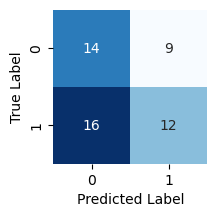

Fitting 5 folds for each of 8 candidates, totalling 40 fits
AUC Score / W2V embeddings_mean: 0.5186335403726708
Classification report and confusion matrix: logistic regression / W2V embeddings_mean
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        23
           1       0.57      0.43      0.49        28

    accuracy                           0.51        51
   macro avg       0.52      0.52      0.51        51
weighted avg       0.52      0.51      0.51        51

Best hyperparameters:
{'C': 100, 'class_weight': 'balanced'}


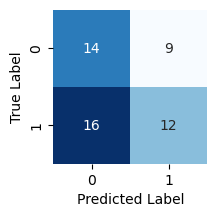

Fitting 5 folds for each of 8 candidates, totalling 40 fits
AUC Score / bag of words: 0.5225155279503105
Classification report and confusion matrix: logistic regression / bag of words
              precision    recall  f1-score   support

           0       0.47      0.65      0.55        23
           1       0.58      0.39      0.47        28

    accuracy                           0.51        51
   macro avg       0.52      0.52      0.51        51
weighted avg       0.53      0.51      0.50        51

Best hyperparameters:
{'C': 100, 'class_weight': None}


c:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


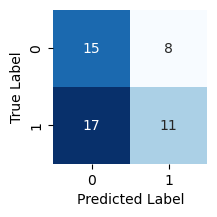

Fitting 5 folds for each of 8 candidates, totalling 40 fits
AUC Score / bag of words_tfidf: 0.5597826086956521
Classification report and confusion matrix: logistic regression / bag of words_tfidf
              precision    recall  f1-score   support

           0       0.49      0.87      0.62        23
           1       0.70      0.25      0.37        28

    accuracy                           0.53        51
   macro avg       0.59      0.56      0.50        51
weighted avg       0.60      0.53      0.48        51

Best hyperparameters:
{'C': 1, 'class_weight': None}


c:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


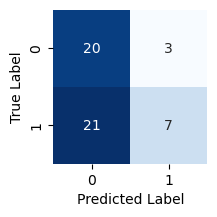

Fitting 5 folds for each of 8 candidates, totalling 40 fits
AUC Score / average sentiment score: 0.5139751552795031
Classification report and confusion matrix: logistic regression / average sentiment score
              precision    recall  f1-score   support

           0       0.46      0.96      0.62        23
           1       0.67      0.07      0.13        28

    accuracy                           0.47        51
   macro avg       0.56      0.51      0.37        51
weighted avg       0.57      0.47      0.35        51

Best hyperparameters:
{'C': 1, 'class_weight': None}


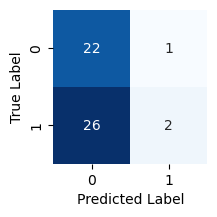

In [16]:
# Calculate data preprocessing, X and y over all nlp_models
for nlp_model in nlp_models: 
    df_BERT, _, _ = data_preprocessing(column_name=nlp_model)
    _, X, _ = data_preprocessing(column_name=nlp_model)
    if nlp_model == 'average sentiment score': #for sentiment column, X has to be reshaped, since only one input feature
        X = X.reshape(-1, 1)
    _, _, y = data_preprocessing(column_name=nlp_model)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    base_clf = LogisticRegression(random_state=42)
    grid_search = GridSearchCV(estimator=base_clf, param_grid=param_grid_lr, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best combination of hyperparameters
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    y_pred_train = best_clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Add accuracy, AUC and test to result table
    accuracy_df[nlp_model]['logistic regression'] = accuracy_test
    AUC_df[nlp_model]['logistic regression'] = auc_score
    train_df[nlp_model]['logistic regression'] = accuracy_train

    # Evaluate the performance of the model
    print(f"AUC Score / {nlp_model}:", auc_score)
    print(f"Classification report and confusion matrix: logistic regression / {nlp_model}")
    print(classification_report(y_test, y_pred))
    print("Best hyperparameters:")
    print(grid_search.best_params_)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Support Vector Machines model
with GridSearch

In [17]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto'],
    'coef0': [0, 1, 2, 3]  
}

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
AUC Score / BERT embeddings_mean: 0.5147515527950312
Classification report and confusion matrix: support vector machine / BERT embeddings_mean
              precision    recall  f1-score   support

           0       0.46      0.57      0.51        23
           1       0.57      0.46      0.51        28

    accuracy                           0.51        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.52      0.51      0.51        51

Best hyperparameters:
{'C': 100, 'coef0': 3, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


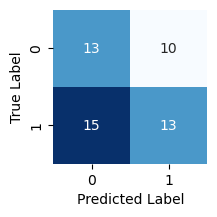

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
AUC Score / W2V embeddings_mean: 0.48680124223602483
Classification report and confusion matrix: support vector machine / W2V embeddings_mean
              precision    recall  f1-score   support

           0       0.44      0.65      0.53        23
           1       0.53      0.32      0.40        28

    accuracy                           0.47        51
   macro avg       0.49      0.49      0.46        51
weighted avg       0.49      0.47      0.46        51

Best hyperparameters:
{'C': 10, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


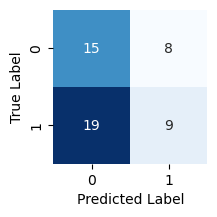

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
AUC Score / bag of words: 0.4984472049689441
Classification report and confusion matrix: support vector machine / bag of words
              precision    recall  f1-score   support

           0       0.45      0.78      0.57        23
           1       0.55      0.21      0.31        28

    accuracy                           0.47        51
   macro avg       0.50      0.50      0.44        51
weighted avg       0.50      0.47      0.43        51

Best hyperparameters:
{'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}


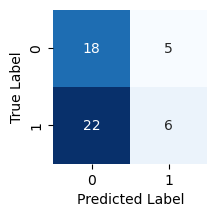

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
AUC Score / bag of words_tfidf: 0.5380434782608695
Classification report and confusion matrix: support vector machine / bag of words_tfidf
              precision    recall  f1-score   support

           0       0.47      0.83      0.60        23
           1       0.64      0.25      0.36        28

    accuracy                           0.51        51
   macro avg       0.56      0.54      0.48        51
weighted avg       0.56      0.51      0.47        51

Best hyperparameters:
{'C': 1, 'coef0': 3, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


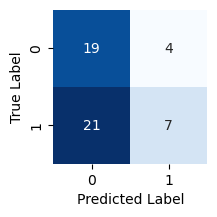

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
AUC Score / average sentiment score: 0.5100931677018634
Classification report and confusion matrix: support vector machine / average sentiment score
              precision    recall  f1-score   support

           0       0.46      0.91      0.61        23
           1       0.60      0.11      0.18        28

    accuracy                           0.47        51
   macro avg       0.53      0.51      0.40        51
weighted avg       0.54      0.47      0.37        51

Best hyperparameters:
{'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}


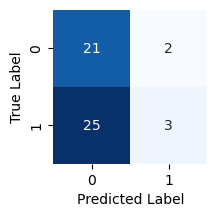

In [18]:
# Calculate data preprocessing, X and y over all nlp_models
for nlp_model in nlp_models: 
    df_BERT, _, _ = data_preprocessing(column_name=nlp_model)
    _, X, _ = data_preprocessing(column_name=nlp_model)
    if nlp_model == 'average sentiment score': #for sentiment column, X has to be reshaped, since only one input feature
        X = X.reshape(-1, 1)
    _, _, y = data_preprocessing(column_name=nlp_model)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    base_clf = SVC(random_state=42)
    grid_search = GridSearchCV(estimator=base_clf, param_grid=param_grid_svm, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best combination of hyperparameters
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    y_pred_train = best_clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Add accuracy, AUC and test to result table
    accuracy_df[nlp_model]['support vector machine'] = accuracy_test
    AUC_df[nlp_model]['support vector machine'] = auc_score
    train_df[nlp_model]['support vector machine'] = accuracy_train

    # Evaluate the performance of the model
    print(f"AUC Score / {nlp_model}:", auc_score)
    print(f"Classification report and confusion matrix: support vector machine / {nlp_model}")
    print(classification_report(y_test, y_pred))
    print("Best hyperparameters:")
    print(grid_search.best_params_)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    

## XGBoost Classifier

In [19]:
param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 5, 6, 10, 20, 30],
    'learning_rate': [0.1, 0.3],
}

Fitting 5 folds for each of 60 candidates, totalling 300 fits
AUC Score / BERT embeddings_mean: 0.41149068322981364
Classification report and confusion matrix: xgboost / BERT embeddings_mean
              precision    recall  f1-score   support

           0       0.39      0.61      0.47        23
           1       0.40      0.21      0.28        28

    accuracy                           0.39        51
   macro avg       0.39      0.41      0.38        51
weighted avg       0.39      0.39      0.37        51

Best hyperparameters:
{'learning_rate': 0.3, 'max_depth': None, 'n_estimators': 50}


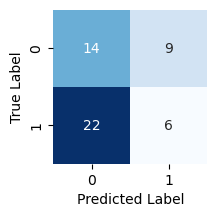

Fitting 5 folds for each of 60 candidates, totalling 300 fits
AUC Score / W2V embeddings_mean: 0.5147515527950312
Classification report and confusion matrix: xgboost / W2V embeddings_mean
              precision    recall  f1-score   support

           0       0.46      0.57      0.51        23
           1       0.57      0.46      0.51        28

    accuracy                           0.51        51
   macro avg       0.51      0.51      0.51        51
weighted avg       0.52      0.51      0.51        51

Best hyperparameters:
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200}


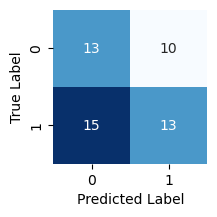

Fitting 5 folds for each of 60 candidates, totalling 300 fits
AUC Score / bag of words: 0.6118012422360248
Classification report and confusion matrix: xgboost / bag of words
              precision    recall  f1-score   support

           0       0.56      0.65      0.60        23
           1       0.67      0.57      0.62        28

    accuracy                           0.61        51
   macro avg       0.61      0.61      0.61        51
weighted avg       0.62      0.61      0.61        51

Best hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


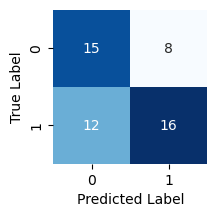

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [20]:
# Calculate data preprocessing, X and y over all nlp_models
for nlp_model in nlp_models: 
    df_BERT, _, _ = data_preprocessing(column_name=nlp_model)
    _, X, _ = data_preprocessing(column_name=nlp_model)
    if nlp_model == 'average sentiment score': #for sentiment column, X has to be reshaped, since only one input feature
        X = X.reshape(-1, 1)
    _, _, y = data_preprocessing(column_name=nlp_model)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    base_clf = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=base_clf, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best combination of hyperparameters
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    y_pred_train = best_clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Add accuracy, AUC and test to result table
    accuracy_df[nlp_model]['xgboost'] = accuracy_test
    AUC_df[nlp_model]['xgboost'] = auc_score
    train_df[nlp_model]['xgboost'] = accuracy_train

    # Evaluate the performance of the model
    print(f"AUC Score / {nlp_model}:", auc_score)
    print(f"Classification report and confusion matrix: xgboost / {nlp_model}")
    print(classification_report(y_test, y_pred))
    print("Best hyperparameters:")
    print(grid_search.best_params_)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Output

In [ ]:
accuracy_df
accuracy_df.to_csv('accuracy.csv', index=False)

NameError: name 'accuracy_df' is not defined

In [ ]:
AUC_df
AUC_df.to_csv('AUC.csv', index=False)

,BERT embeddings_mean,W2V embeddings_mean,bag of words,bag of words_tfidf,average sentiment score
dummy classifier,0.540373,0.540373,0.540373,0.540373,0.540373
random forest,0.447205,0.458851,0.478261,0.478261,0.360248
logistic regression,0.518634,0.518634,0.522516,0.559783,0.513975
support vector machine,0.514752,0.486801,0.498447,0.538043,0.510093
xgboost,0.411491,0.514752,0.611801,0.611801,0.346273


In [ ]:
train_df
train_df.to_csv('train_accuracy.csv', index=False)

,BERT embeddings_mean,W2V embeddings_mean,bag of words,bag of words_tfidf,average sentiment score
dummy classifier,0.51,0.51,0.51,0.51,0.51
random forest,1.0,1.0,1.0,1.0,0.96
logistic regression,0.965,0.85,1.0,1.0,0.575
support vector machine,1.0,0.97,0.95,1.0,0.585
xgboost,1.0,1.0,1.0,1.0,0.73
